Notebook als Präsentation bauen:
``` $ jupyter nbconvert notebooks/presentation_slides_german.ipynb --to slides --post serve ```

In [1]:
import pandas as pd
import sklearn
import sklearn.linear_model

# Was ist Data Science?

Kern: Aus histoischen Daten Vorhersagen treffen.

Dafür gibt es viele Algorithmen.
Eine einfache und weit verbreitete ist die lineare Regression.

# Lineare Regression

Wir verwenden einen Mini-Datensatz der 1960 von Nancy Howell zum Studium des Volkes der ǃKung gesammelt wurde (https://en.wikipedia.org/wiki/%C7%83Kung_people) (und nur Personen <= 25 Jahre)


In [8]:
df = pd.read_csv("../data/Howell1_young.csv")

In [9]:
df.head()

,Unnamed: 0,height,weight,age,male
0,8,147.955,34.869885,19.0,0
1,13,149.900,47.700000,20.0,0
2,18,121.920,19.617854,12.0,1
3,19,105.410,13.947954,8.0,0
4,20,86.360,10.489315,6.5,0


<AxesSubplot: xlabel='age', ylabel='height'>

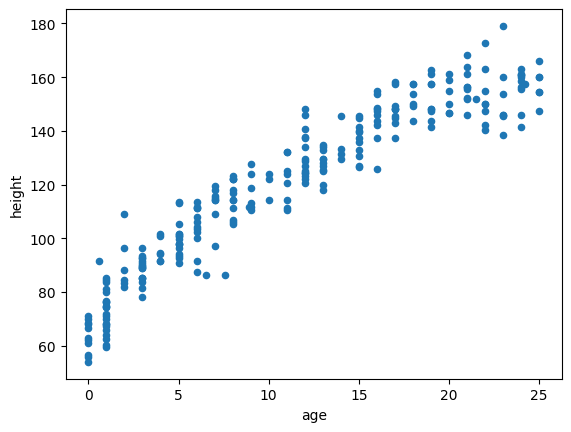

In [4]:
df.plot.scatter(x="age", y="height")

Modell: $y =f(x)$ mit $f$ unbekannt und *linear*.

$y = a\cdot x + b$

wähle $a,b$ so, dass $f$ "gut" zu den Daten passt $\to$ die mittlere quadratische Abweichung zwischen f und den Datenpunkten ist minimal.


Gegeben n Paare von Datenpunkten $(x^{(1)}, y^{(1)}), ..., (x^{(n)}, y^{(n)})$
suchen wir $a,b$ so dass der Ausdruck

$\frac{1}{n} \sum_{i=1}^n (a\cdot x^{(i)} + b - y^{(i)})^2$

minimal wird.

In [5]:
linear_reg = sklearn.linear_model.LinearRegression()

training_ind = 

x = df[["age"]]
y_true = df["height"]

linear_reg.fit(x,y_true) # berechnet a und b

LinearRegression()

In [6]:
a = linear_reg.coef_[0]
b = linear_reg.intercept_
print(f"a = {a}, b = {b}")

a = 3.6991808845422742, b = 78.39875682737627


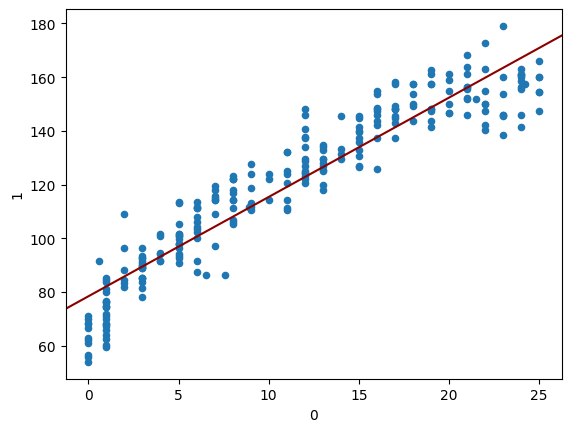

In [7]:
ax = pd.DataFrame(list(zip(x.iloc[:,0],y_true))).plot.scatter(x=0, y=1)
y_pred = linear_reg.predict(x)
ax.axline((0,b), slope=a, color="darkred")

## Modell-Evaluation


### Plot der Residuen

Erinnerung: wir haben Datenpunkte $(x^{(i}, y^{(i})$
Sei $\hat{y^{(i}}$ die Vorhersage unseres Regressionsmodells für den $i$-ten Datenpunkt.
Für jedes $i$ ist die Abweichung $r_i = \hat{y^{(i}} - y^{(i})$. Diese nennen wir *Residuuen* und wenn unser Regressionsmodell auf die Daten passt, sollten diese Residuen keine systematischen Abweichungen ("Bias") zeigen.
Wenn wir sie also plotten sollten sie zufällig um $0$ streuen.


### $R^2$

Das simpleste Modell für die Zielvariable, wäre einfach den Mittelwert der Trainingsdaten zu nehmen.
Wir wollen die mittlere quadratische Abweichung unseres Modells gegen dieses "Mittelwert-Modell" vergleichen.
Im schlechtesten Fall liefern wir das selbe, das soll einen Wert von $0$ ergeben. Im besten Fall ist die Abweichung von den Daten $0$, dann soll unsere Bewertung $1$ sein.

$R^2 = 1 - \frac{\frac{1}{n} \sum_i (y^{(i)} - \hat{y^{(i)})}}{\frac{1}{n} \sum_i (y^{(i)} - \bar{y})} = 1 - \frac{\sum_i (y^{(i)} - \hat{y})}{\sum_i (y^{(i)} - \bar{y})}$



Die Varianz (=Streuung) der Daten ist ihre mittlere quadratische Abweichung von ihrem Mittelwert $\bar{y}$:

$ \frac{1}{n} \sum_i (y^{(i)} - \bar{y})^2 $

Eine andere Interpretation von $R^2$ ist der Anteil der vom Modell "erklärten" Varianz der Daten
$R^2 = 1 - \frac{\sum_i (y^{(i)} - \hat{y})}{\sum_i (y^{(i)} - \bar{y})}$

## Over/Underfitting

# Projekt: Toronto Bike Sharing

Wir haben Daten von Bike Share Toronto (https://bikesharetoronto.com/)
Für jede Reise werden Daten (z.B. von wo nach wo, wie lange dauerte die Fahrt) gesammelt, die online verfügbar sind (https://open.toronto.ca/dataset/bike-share-toronto-ridership-data/).

Wir wollen 1 Woche im Voraus vorhersagen, wie viele Räder an einem gewissen Tag an einer Station ausgeliehen werden.

# Daten

Bike Share Toronto, ~630 Stationen und ~7000 Räder.

Die Datenfelder sind
* Trip ID [int]
* Trip Duration [s, int]
* Trip Start Station ID [int]
* Trip Start time [timestamp]
* Trip Start Station Name [string]
* Trip End Station ID [int]
* Trip End Time [timestamp]
* Trip End Station Name [string]
* Bike ID [int]
* User type [string, eigentlich boolean 0/1 (member/casual)]


# Schritte 
1. Mache Dich mit den Daten vertraut (download, Einlesen)
2. Hauptaufgabe: 
   a) Für jeden Tag und Station voraussagen, wie viele Fahrräder dort ausgeliehen werden.
   b) Extrahiere aus den Daten weitere Features, die die Vorhersage verbessern.
3. Mögliche Erweiterungen (erstmal ein Modell für Frage 2 bauen und evaluieren!):
 * Nutze weitere Datenquellen um die Vorhersage aus 2) zu verbessern (z.B. Wetter https://toronto.weatherstats.ca/download.html).
 * Was könnten andere Ziel-Variablen als "tägliche Anzahl Ausleihvorgänge" sein, die vielleicht für die Betreiber hilfreich(er) sind?
 * ...

# Links

## Nützliche Dokumentationen
https://pandas.pydata.org/docs/user_guide/indexing.html

https://pandas.pydata.org/docs/user_guide/merging.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html

## weitere Links
https://bikesharetoronto.com/faq/

https://www.kaggle.com/code/yclaudel/see-the-flow-of-bikes/notebook
(da wird auch beschrieben, wie man an die Stations-Daten https://tor.publicbikesystem.net/ube/gbfs/v1/en/station_information kommt)

https://tellingstorieswithdata.com/inputs/pdfs/paper_one-2022-hudson_yuen.pdf

https://toronto.weatherstats.ca/download.html (3 Jahre = 1095 Tage)

https://opendata.stackexchange.com/questions/7793/age-weight-and-height-dataset (Referenz auf https://github.com/rmcelreath/rethinking/blob/master/data/Howell1.csv und https://github.com/rmcelreath/rethinking/blob/master/data/Howell2.csv)
